In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2
from utils import *
from preprocess import * 
from detect_answer import *
from detect_cross import *

In [2]:
plt.rcParams['figure.figsize'] = [8, 8]

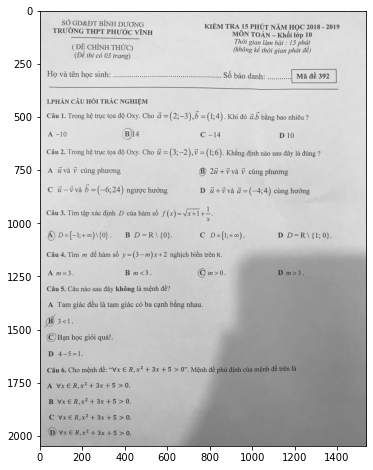

In [3]:
img = cv2.imread('exam2.png', 0)
plt.imshow(img, cmap='gray')

In [4]:
binary_img = preprocess(img)

NameError: name 'preprocess' is not defined

In [ ]:
close = closing(binary_img, (2,2))

In [ ]:
filled = fill_holes(close)

In [ ]:
open = opening(filled, (5,5))

In [ ]:
contours = find_contours(open)

In [ ]:
circle_centers = detect_circle(binary_img, contours, 0.7, 135)
circle_centers

In [ ]:
choices = get_circles_no_cross(close, circle_centers)

In [ ]:
answers = get_answer(choices)
answers

In [ ]:
right_answers = ['B', 'B', 'A', 'A', 'A', 'C']
right_answers = convert_answer_type(right_answers)
score = get_score(answers, right_answers)
print(score)